In [1]:
from utils.preprocessing import ExtendedPreprocessPipeline
from scipy.stats import iqr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import norm

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
df_test = ExtendedPreprocessPipeline.run(pd.read_csv('data/sales_ads_test.csv'))
df_train = ExtendedPreprocessPipeline.run(pd.read_csv('data/sales_ads_train.csv'))
df_data = pd.concat((df_train, df_test), ignore_index=True, copy=True).reset_index()
len(df_test), len(df_train)

Log: Date range : 2021-01-04 00:00:00, 2021-12-04 00:00:00
Log: Preprocessing currency did not found `Cena` column. Skipping.
Log: Date range : 2021-01-05 00:00:00, 2021-12-04 00:00:00
Log: Amount of samples with foreign currency  : 165


(72907, 135397)

## Price investigation
Analysing the distribution of price.

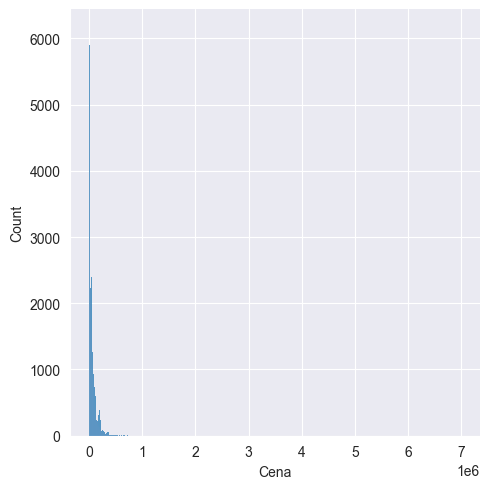

Median : 35900.0
Quantile 90% : 144000.0
Top 10 : [6999000.  6298670.1 2583000.  2370000.  2300000.  2101970.  2100000.
 1950000.  1904040.  1862200. ]


In [4]:
# Distribution of the price
plt.show(sns.displot(df_train.Cena))
print(f"Median : {df_train.Cena.quantile(0.5)}")
print(f"Quantile 90% : {df_train.Cena.quantile(0.9)}")
print(f"Top 10 : {df_train.Cena.sort_values(ascending=False).head(10).to_numpy()}")

In [5]:
display(df_train.sort_values('Cena', ascending=False).head(2))  # The most severe ones
print(f"Average McLaren price : {df_train.groupby('Marka_pojazdu').agg({'Cena': 'mean'}).loc['McLaren', 'Cena']}")

,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Emisja_CO2,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie,...,wyp_rear_side_airbags,wyp_air_curtains,wyp_daytime_running_lights,wyp_front_side_airbags,wyp_parking_assistant,wyp_front_parking_sensors,wyp_speed_limiter,wyp_airbag_protecting_the_knees,wyp_led_lights,wyp_active_cruise_control,wyp_lane_assistant,wyp_blind_spot_sensor,wyp_hook,wyp_rear_view_camera,wyp_gps_navigation,wyp_heated_side_mirrors,wyp_leather_upholstery,wyp_electrically_adjustable_seats,wyp_dvd_player,wyp_sunroof,wyp_cd_changer,wyp_xenon_lights,wyp_shift_paddles,wyp_panoramic_roof,Wiek_oferty
28851,28852,6999000.0,PLN,Used,BMW,X3,NaN,NaN,2014.0,238000.0,190.0,2000.0,Diesel,NaN,4x4 (permanent),Automatic,SUV,5.0,silver,NaN,NaN,NaN,2021-04-05,"ŁYSKOWSKIEGO, 55B - 86-300 Grudziądz, Kujawsko...","['ABS', 'Central locking', 'Electric rear wind...",...,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,243.0
131997,131998,6298670.1,EUR,New,McLaren,720S Coupe,Standard,NaN,2020.0,1.0,730.0,3994.0,Gasoline,249.0,Rear wheels,Automatic,NaN,2.0,black,NaN,NaN,NaN,2021-04-30,"PS DAmunt 7 - 08024 Madrid, Comunidad de Madri...",[],...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218.0


Average McLaren price : 1464337.94375


In [6]:
df_train.drop(df_train[df_train.Cena == 6999000.0].index, inplace=True)  # Such BMW seems like an anomaly
df_data.drop(df_data[df_data.Cena == 6999000.0].index, inplace=True)  # Such BMW seems like an anomaly

Amount of outliers 3-sigma rule : 292
Outliers extremes : 585.0, 6298670.1
Outliers ~3 sigma range : 699900.0 1999.0
Outliers ~4 sigma range : 1399915.1250000023 1000.0


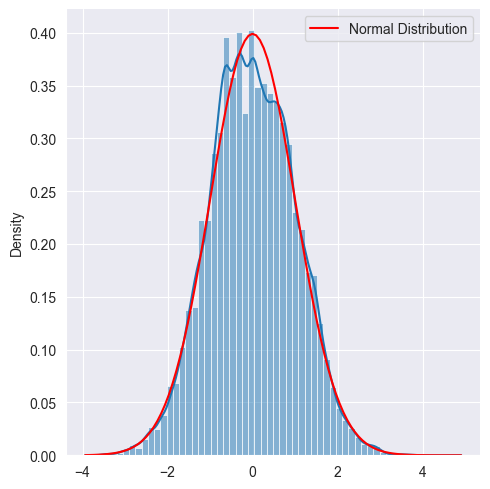

In [7]:
x = df_train.Cena.to_numpy()
x = np.log(x)
x = (x - x.mean()) / (x.std())
sns.displot(x, kde=True, stat="density", bins=60)
normal = np.linspace(min(x), max(x), 100)
y = norm.pdf(normal, 0, 1)
plt.plot(normal, y, 'r-', label='Normal Distribution')
outliers = x[(x < -3) | (x > 3)]
print(f"Amount of outliers 3-sigma rule : {len(outliers)}")
print(f"Outliers extremes : {df_train.Cena[(x < -3) | (x > 3)].min()}, {df_train.Cena[(x < -3) | (x > 3)].max()}")
print(f"Outliers ~3 sigma range : {df_train.Cena.quantile(0.9975)} {df_train.Cena.quantile(0.0025)}")
print(f"Outliers ~4 sigma range : {df_train.Cena.quantile(0.99975)} {df_train.Cena.quantile(0.00025)}")
plt.legend()
plt.show()

In [8]:
df_train['Cena_log'] = df_train.Cena.apply(np.log)
df_data['Cena_log'] = df_data.Cena.to_numpy()
df_data.loc[~df_data['Cena_log'].isna(), 'Cena_log'] = df_train['Cena_log']

Notes are that data is very skewed to the left. There are a few extreme target outliers, 
which will be hard to tackle during prediction (probable premium car brands).
Since top 2 cars are 3 times more expensive than the rest most expensive cars, they should
be excluded. They are too big of an outlier. Without augmentation it would be extremely hard
to take them into account. <br/><br/>
Therefore, a log can be applied as data show patterns of exponential growth typical for sales data. After log
transformation it can be seen that the data was in fact exponentially distributed. Furthermore, according to
3-sigma rule we can identify values, which would be hard targets for the model as they fall into extreme
regions of the normal distribution. This gives us total of 219 such samples.

## Horse power inverstigation
Analysing the correlation between horsepower and other features. Tracking anomalies
based on plots and logical real worlds assumptions (small engine can't have high power etc.)

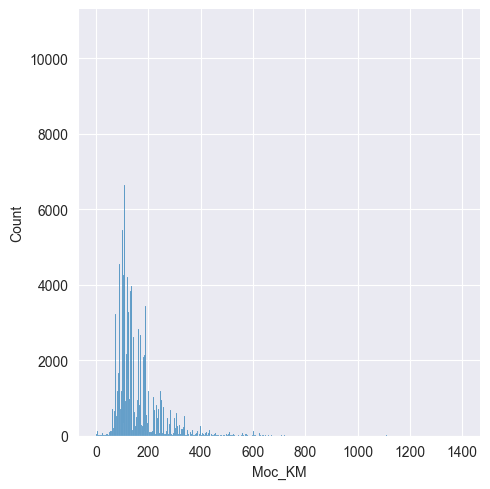

Top 10 horse power : [1398.0, 1236.0, 1203.0, 1111.0, 1111.0]
Top 10 horse power (Test) : [1398.0, 1300.0, 1236.0, 1115.0, 1000.0]
Top 10 horse power (Brands) : ['Volkswagen', 'Bentley', 'Renault', 'Ford', 'Buick']


In [9]:
plt.show(sns.displot(df_train.Moc_KM))
print(f"Top 10 horse power : {df_train.Moc_KM.sort_values(ascending=False).head(5).to_list()}")
print(f"Top 10 horse power (Test) : {df_test.Moc_KM.sort_values(ascending=False).head(5).to_list()}")
print(f"Top 10 horse power (Brands) : {df_train.sort_values('Moc_KM', ascending=False).Marka_pojazdu.head(5).to_list()}")

,ID,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Emisja_CO2,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie,Lista_wyposazenia,...,wyp_on-board_computer,wyp_mp3,wyp_heated_side_mirrors,wyp_rear_side_airbags,wyp_start-stop_system,wyp_fog_lights,wyp_multifunction_steering_wheel,wyp_airbag_protecting_the_knees,wyp_velor_upholstery,wyp_leather_upholstery,wyp_electrically_adjustable_seats,wyp_sd_socket,wyp_lane_assistant,wyp_blind_spot_sensor,wyp_cd_changer,wyp_hook,wyp_manual_air_conditioning,wyp_heated_rear_seats,wyp_active_cruise_control,wyp_panoramic_roof,wyp_dvd_player,wyp_heated_windscreen,wyp_adjustable_suspension,wyp_sunroof,Wiek_oferty
50072,50073,PLN,Used,Chevrolet,Volt,NaN,NaN,2016,44600.0,1398.0,NaN,Electric,NaN,NaN,Automatic,sedan,5.0,red,United States,NaN,01/01/2017,2021-04-27,"Bezrzecze, gm. Dobra (Szczecińska), policki, Z...","['ABS', 'Electrically adjustable mirrors', 'Pa...","[ABS, Electrically adjustable mirrors, Passeng...",...,1,0,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,221.0
46536,46537,PLN,Used,Suzuki,Grand Vitara,NaN,II (2005-2014),2007,212000.0,1300.0,1997.0,Diesel,NaN,4x4 (attached manually),Manual,SUV,5.0,black,NaN,NaN,NaN,2021-04-25,"Biała Podlaska, Lubelskie","['ABS', 'Electric front windows', 'Drivers air...","[ABS, Electric front windows, Drivers airbag, ...",...,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,223.0
48987,48988,PLN,Used,Bentley,Other,NaN,NaN,1970,77000.0,1236.0,6700.0,Gasoline,NaN,NaN,Automatic,sedan,4.0,other,NaN,NaN,NaN,2021-01-05,"Starogard Gdański, starogardzki, Pomorskie","['ABS', 'Power steering', 'Leather upholstery'...","[ABS, Power steering, Leather upholstery, Elec...",...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,333.0
9106,9107,PLN,Used,Volkswagen,Bora,NaN,NaN,2001,215000.0,1115.0,1994.0,Gasoline + LPG,NaN,Front wheels,Manual,sedan,4.0,blue,Germany,NaN,NaN,2021-04-05,"Wrocław, Dolnośląskie, Fabryczna","['ABS', 'Electrochromic rear view mirror', 'El...","[ABS, Electrochromic rear view mirror, Electri...",...,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,243.0
20991,20992,PLN,Used,Renault,Megane,NaN,III (2008-2016),2010,145566.0,1000.0,1598.0,Gasoline,NaN,Front wheels,Manual,city_cars,5.0,gray,NaN,Yes,NaN,2021-02-05,"Koscielniaka 113 - 41-409 Mysłowice, Śląskie (...","['ABS', 'Electric front windows', 'On-board co...","[ABS, Electric front windows, On-board compute...",...,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,302.0


,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Emisja_CO2,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,Wyposazenie,...,wyp_air_curtains,wyp_daytime_running_lights,wyp_front_side_airbags,wyp_parking_assistant,wyp_front_parking_sensors,wyp_speed_limiter,wyp_airbag_protecting_the_knees,wyp_led_lights,wyp_active_cruise_control,wyp_lane_assistant,wyp_blind_spot_sensor,wyp_hook,wyp_rear_view_camera,wyp_gps_navigation,wyp_heated_side_mirrors,wyp_leather_upholstery,wyp_electrically_adjustable_seats,wyp_dvd_player,wyp_sunroof,wyp_cd_changer,wyp_xenon_lights,wyp_shift_paddles,wyp_panoramic_roof,Wiek_oferty,Cena_log
132975,132976,190199.0,PLN,New,Volkswagen,Passat,NaN,B8 (2014-),2021.0,1.0,1398.0,NaN,Hybrid,NaN,Front wheels,Automatic,sedan,5.0,black,NaN,NaN,NaN,2021-04-30,"ul. Radzymińska 78 - 03-752 Warszawa, Praga-Pó...","['ABS', 'Twilight sensor', 'Isofix', 'On-board...",...,1,0,1,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,218.0,12.155826
86447,86448,55900.0,NaN,Used,Bentley,Other,NaN,NaN,NaN,77000.0,1236.0,6700.0,Gasoline,NaN,NaN,Automatic,sedan,4.0,other,NaN,NaN,NaN,2021-01-05,"Starogard Gdański, starogardzki, Pomorskie","['ABS', 'Power steering', 'Leather upholstery'...",...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,333.0,10.931320
124210,124211,6600.0,PLN,Used,Renault,Espace,NaN,NaN,2007.0,191874.0,1203.0,1900.0,Diesel,NaN,Front wheels,Manual,minivan,5.0,blue,NaN,Yes,NaN,2021-04-26,"Staszica 2 - 64-030 Śmigiel, kościański, Wielk...","['ABS', 'CD', 'Twilight sensor', 'ESP(stabiliz...",...,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,222.0,8.794825
14341,14342,49000.0,PLN,Used,Ford,Ranchero,NaN,NaN,1979.0,1111.0,1111.0,1111.0,Gasoline,NaN,NaN,Automatic,station_wagon,2.0,red,NaN,NaN,NaN,2021-04-29,"Kazimierza Wlk 102 - 32-300 Olkusz, olkuski, M...",[],...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,219.0,10.799576
36292,36293,57000.0,PLN,NaN,Buick,Other,NaN,NaN,1957.0,11111.0,1111.0,1111.0,Gasoline,NaN,NaN,Automatic,city_cars,2.0,black,United States,NaN,NaN,2021-04-29,"Kazimierza Wlk 102 - 32-300 Olkusz, olkuski, M...",[],...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,219.0,10.950807


IQR based range 6.0 : 270.0


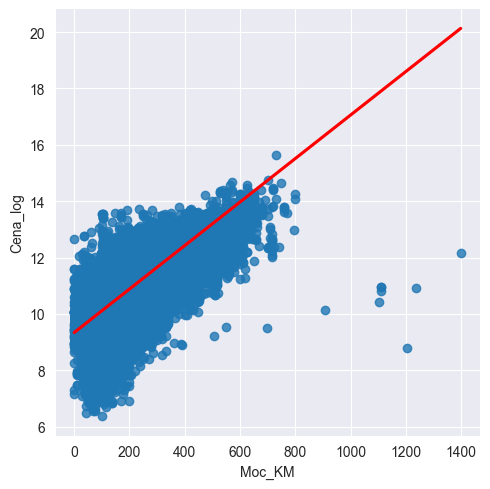

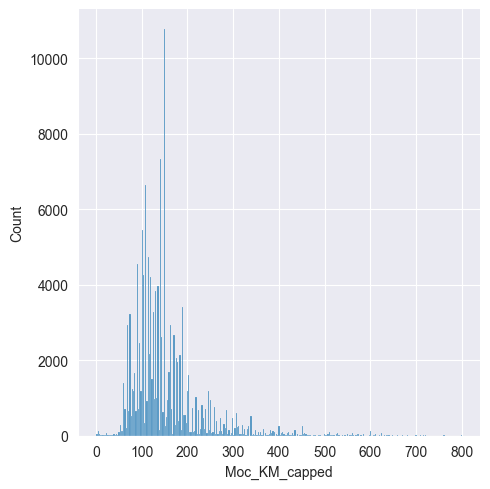

In [10]:
display(df_test.sort_values('Moc_KM', ascending=False).head(5))
display(df_train.sort_values('Moc_KM', ascending=False).head(5))
print(f"IQR based range {df_test.Moc_KM.quantile(0.25) - 1.5 * iqr(df_test.Moc_KM.values, nan_policy='omit')} : {df_test.Moc_KM.quantile(0.75) + 1.5 * iqr(df_test.Moc_KM.values, nan_policy='omit')}")
sns.lmplot(x="Moc_KM", y="Cena_log", data=df_train, ci=None, line_kws={'color': 'red'})
df_train.loc[:, 'Moc_KM_capped'] = df_train.Moc_KM.to_numpy()
df_train.loc[df_train.Moc_KM > 800, 'Moc_KM_capped'] = 800
plt.show(sns.displot(df_train.Moc_KM_capped))
df_train.drop(columns='Moc_KM_capped', inplace=True)

There are Suzuki and Passat with extreme horsepower values, which suggests some potential anomalies.
To fix them the approach would be
capping the value based on the standard deviation and mean of `Moc_KM` for each `Marka_pojazdu`. This could
help as it is also applicable for the testing set.
Furthermore, engine volume (`Pojemnocs_cm`) in real world has high correlation with power. Therefore, it could be used for
detecting outliers. Here a simple linear regression line should discover some anomalies.
<br/><br/>
Anyway, it can be seen that correlation between price and power exists, but it is messy.

Value threshold : 100 - (0.04801%)
Second value threshold : 10 - (0.00480%)


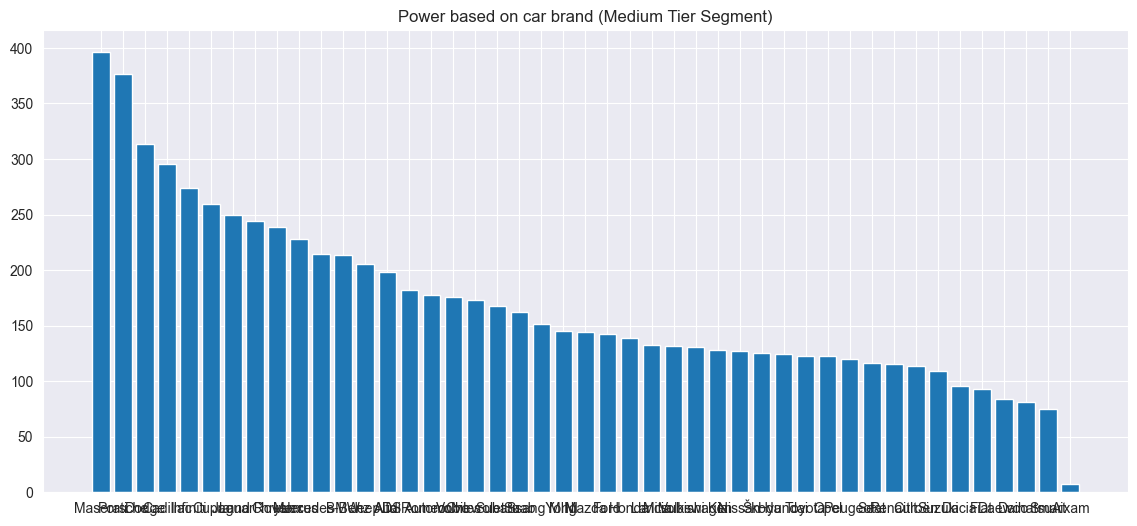

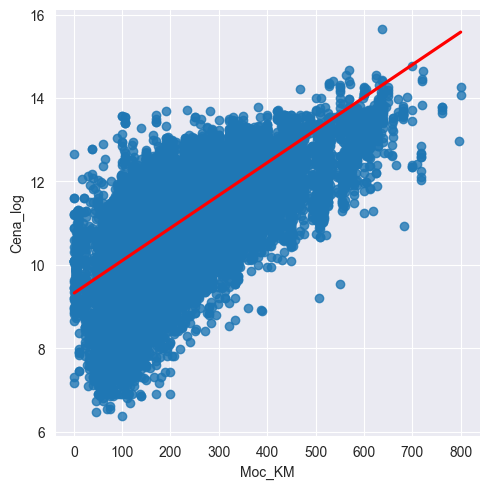

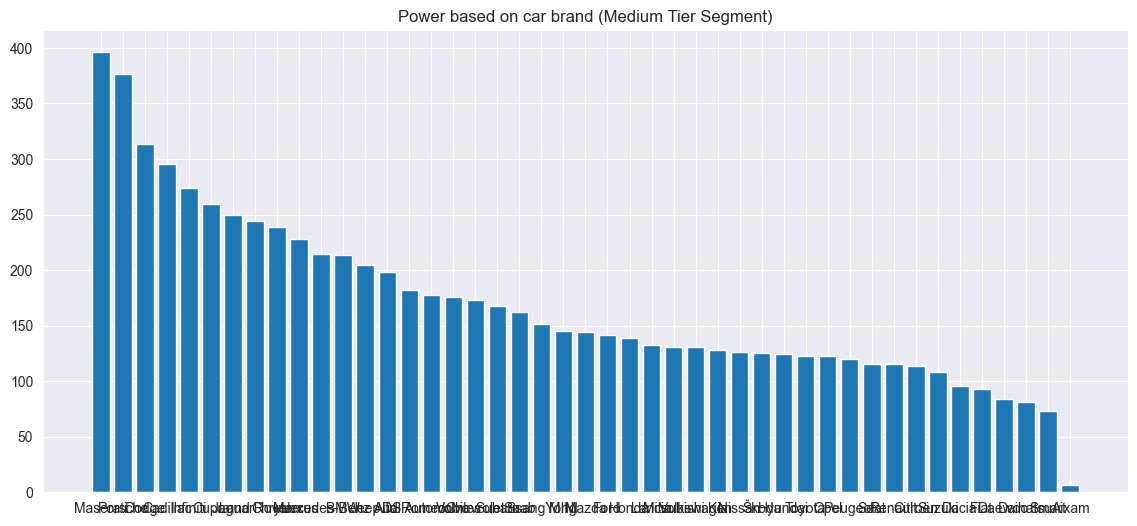

Capped total of 416 samples, which is 0.1997%


In [11]:
value_threshold = 100
value_second_threshold = 10
sigma_scalar = 5
print(f"Value threshold : {value_threshold} - ({value_threshold / len(df_data) * 100:.5f}%)")
print(f"Second value threshold : {value_second_threshold} - ({value_second_threshold / len(df_data) * 100:.5f}%)")

funcs = ('mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75))
power_table = ((df_data.groupby('Marka_pojazdu').agg({'Moc_KM': funcs}))
               .sort_values(('Moc_KM', 'mean'), ascending=False))
power_table.columns = ('mean', 'std', 'Q1', 'Q2', 'Q3')

value_counts = df_data.Marka_pojazdu.value_counts()[power_table.index]
plt.figure(figsize=(14, 6))
common_brands = power_table[value_counts >= value_threshold]
plt.bar(common_brands.index, common_brands.loc[:, 'mean'])
plt.title('Power based on car brand (Medium Tier Segment)')
plt.show()

ceiling = common_brands.loc[:, 'mean'] + common_brands.loc[:, 'std'] * sigma_scalar
def cap_power_based_on_brand(row: pd.Series):
    row = row.copy()
    if row.Marka_pojazdu not in common_brands.index:
        return row
    if row.Moc_KM > ceiling[row.Marka_pojazdu]:
        row.Moc_KM = ceiling[row.Marka_pojazdu]
    return row
df_data_capped = df_data.loc[:, ['Moc_KM', 'Marka_pojazdu', 'Cena_log']].apply(cap_power_based_on_brand, axis=1)

uncommon_brands = power_table[(value_counts < value_threshold) & (value_counts >= value_second_threshold)]
IQR = uncommon_brands.loc[:, 'Q3'] - uncommon_brands.loc[:, 'Q1']
ceiling = uncommon_brands.loc[:, 'Q2'] + 1.5 * IQR
floor = uncommon_brands.loc[:, 'Q2'] - 1.5 * IQR
def cap_power_based_on_brand(row: pd.Series):
    row = row.copy()
    if row.Marka_pojazdu not in uncommon_brands.index:
        return row
    if row.Moc_KM > ceiling[row.Marka_pojazdu]:
        row.Moc_KM = ceiling[row.Marka_pojazdu]
    elif row.Moc_KM < floor[row.Marka_pojazdu]:
        row.Moc_KM = floor[row.Marka_pojazdu]
    return row
df_data_capped = df_data_capped.apply(cap_power_based_on_brand, axis=1)
sns.lmplot(x="Moc_KM", y="Cena_log", data=df_data_capped, ci=None, line_kws={'color': 'red'})

power_table = df_data_capped.groupby('Marka_pojazdu').agg({'Moc_KM': ('mean', 'std')}).sort_values(('Moc_KM', 'mean'), ascending=False)
value_counts = df_data_capped.Marka_pojazdu.value_counts()[power_table.index]
plt.figure(figsize=(14, 6))
common_brands = power_table[value_counts >= value_threshold]
plt.bar(common_brands.index, common_brands.loc[:, ('Moc_KM', 'mean')])
plt.title('Power based on car brand (Medium Tier Segment)')
plt.show()

df_data.loc[:, 'Moc_KM_brand_capped'] = df_data_capped.Moc_KM.to_numpy()
total_capped = (df_data.Moc_KM != df_data.Moc_KM_brand_capped)[~df_data.Moc_KM.isna()].sum()
print(f"Capped total of {total_capped} samples, which is {total_capped / len(df_data) * 100:.4f}%")

Here values were clipped based on the average horsepower per brand category. Categories with high amount of
samples were treated with 3-sigma rule to take into account variance of the data, whereas small samples
were filtered by IQR due to unreliable standard deviation.

In [12]:
# Manual checking for potential problems and ideas
df_data_capped.sort_values('Moc_KM', ascending=False).head(2)
display(df_data_capped.sort_values('Moc_KM', ascending=False).head(15))

,Moc_KM,Marka_pojazdu,Cena_log
149804,885.000000,Dodge,NaN
81809,800.000000,Ferrari,14.265949
86143,800.000000,Ferrari,14.077105
16242,797.000000,Dodge,12.971530
148343,774.000000,Dodge,NaN
185469,771.077185,Chevrolet,NaN
6562,761.000000,Porsche,13.628869
160534,761.000000,Porsche,NaN
6693,761.000000,Porsche,13.781970
138255,761.000000,Porsche,NaN


Additionally, the engine volume can be taken into account. Notice, that although high volume engines can have
low power due to low rpm limit, inefficient burning and so on, the small volume engines are very hard to
improve on power. Therefore, the outliers below regression line should be taken into account.<br/><br/>
Keep in mind the volume may also have outliers! Furthermore, in this case horsepower outliers were managed
by the categories (with logical assumptions that categories has strong influence on the horsepower). Thus,
it is more probable that the engine volume contains outliers rather than horsepower.

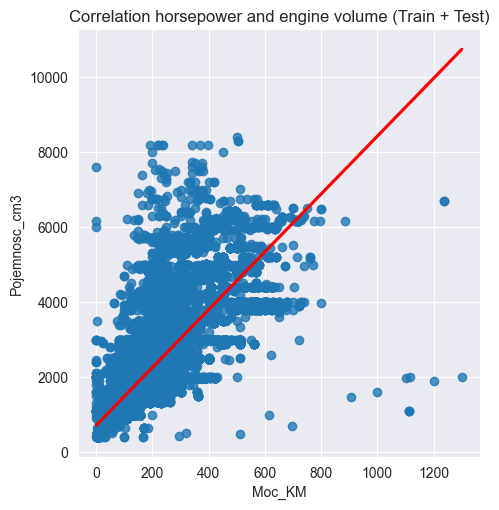

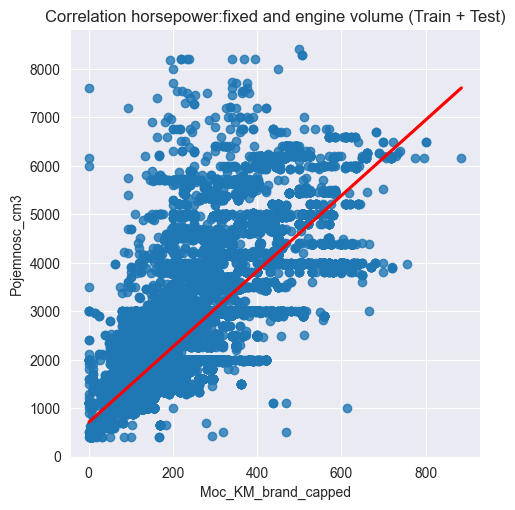

In [13]:
sns.lmplot(x="Moc_KM", y="Pojemnosc_cm3", data=df_data, ci=None, line_kws={'color': 'red'})
plt.title("Correlation horsepower and engine volume (Train + Test)")
plt.show()
sns.lmplot(x="Moc_KM_brand_capped", y="Pojemnosc_cm3", data=df_data, ci=None, line_kws={'color': 'red'})
plt.title("Correlation horsepower:fixed and engine volume (Train + Test)")
plt.show()

Funny horizontal line patterns on the plot are due to often engines fixed volume, which can have
various power based on compression, turbo etc.

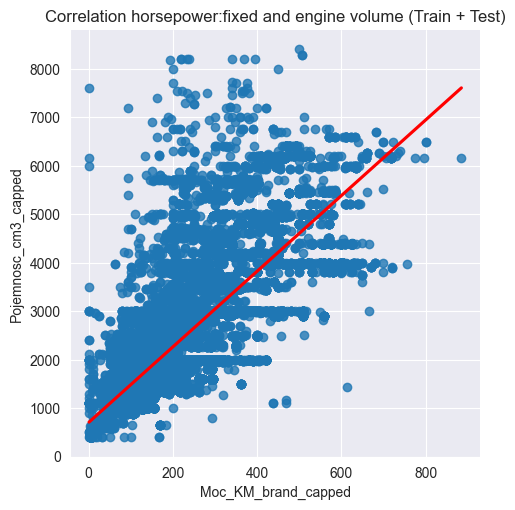

,index,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Emisja_CO2,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,...,wyp_front_parking_sensors,wyp_speed_limiter,wyp_airbag_protecting_the_knees,wyp_led_lights,wyp_active_cruise_control,wyp_lane_assistant,wyp_blind_spot_sensor,wyp_hook,wyp_rear_view_camera,wyp_gps_navigation,wyp_heated_side_mirrors,wyp_leather_upholstery,wyp_electrically_adjustable_seats,wyp_dvd_player,wyp_sunroof,wyp_cd_changer,wyp_xenon_lights,wyp_shift_paddles,wyp_panoramic_roof,Wiek_oferty,wyp_heated_rear_seats,wyp_adjustable_suspension,Cena_log,Moc_KM_brand_capped,Pojemnosc_cm3_capped
7977,7977,7978,55000.0,PLN,Used,Mercedes-Benz,SL,NaN,R129 (1989-2000),1999.0,231108.0,320.0,500.0,Gasoline,NaN,Rear wheels,Automatic,convertible,2.0,black,NaN,NaN,NaN,2021-04-30,"Warszawa, Mazowieckie, Żoliborz",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218.0,NaN,NaN,10.915088,320.000000,1264.457220
24437,24437,24438,13500.0,PLN,Used,Smart,NaN,NaN,NaN,2003.0,112000.0,698.0,698.0,Gasoline,NaN,Rear wheels,Automatic,small_cars,2.0,black,NaN,NaN,09/09/2020,2021-04-29,"Gdańsk, Pomorskie, Śródmieście",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,219.0,NaN,NaN,9.510445,278.588279,1363.457220
58714,58714,58715,359221.0,PLN,Used,Tesla,Model X,NaN,NaN,NaN,62835.0,613.0,1000.0,Diesel,NaN,4x4 (attached automatically),Automatic,city_cars,5.0,black,NaN,NaN,NaN,2021-04-05,"LIPOWA 2 - 55-300 Komorniki, średzki, Dolnoślą...",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,243.0,NaN,NaN,12.791693,613.000000,1436.463805
144019,144019,8623,NaN,PLN,Used,Ford,Mustang,NaN,NaN,2018.0,4500.0,510.0,498.0,Gasoline,NaN,Rear wheels,Manual,coupe,3.0,yellow,Canada,Yes,05/05/2019,2021-04-24,"Kołobrzeg, kołobrzeski, Zachodniopomorskie",...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,224.0,0.0,0.0,NaN,467.577136,1158.166109
179382,179382,43986,NaN,PLN,Used,Lexus,LS,NaN,III (2000-2006),2001.0,90000.0,294.0,430.0,Gasoline,NaN,Rear wheels,Automatic,sedan,5.0,silver,United States,Yes,03/02/2020,2021-04-24,"Kłodzko, kłodzki, Dolnośląskie",...,1,0,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1,0,0,224.0,1.0,0.0,NaN,294.000000,800.493435


In [14]:
error_threshold = -2_001  # Only for significant outliers
volume_threshold = 1_001  # Only for engines smaller than 1 liter (assumption based on car domain knowledge)
volume_min = 1_000
decay_scalar = 0.5  # How much to diminish the total outliers
mask = ~(df_data.Pojemnosc_cm3.isna() | df_data.Moc_KM_brand_capped.isna())
slope, bias = np.polyfit(df_data.Moc_KM_brand_capped[mask].to_numpy(),
                         df_data.Pojemnosc_cm3[mask].to_numpy(), 1)
errors = (df_data.Pojemnosc_cm3[mask].to_numpy() - (bias + slope * df_data.Moc_KM_brand_capped[mask].to_numpy()))
args = np.argwhere((df_data.Pojemnosc_cm3[mask].to_numpy() < volume_threshold) & (errors < error_threshold))
indices = df_data.Moc_KM_brand_capped[mask].index[args.flatten()]

df_data.loc[:, 'Pojemnosc_cm3_capped'] = df_data.Pojemnosc_cm3.to_numpy()
df_data.loc[indices, 'Pojemnosc_cm3_capped'] = (df_data.loc[indices, 'Pojemnosc_cm3_capped'] + bias + slope * df_data.Moc_KM_brand_capped[mask].to_numpy()[indices]) / 2
sns.lmplot(x="Moc_KM_brand_capped", y="Pojemnosc_cm3_capped", data=df_data, ci=None, line_kws={'color': 'red'})
plt.title("Correlation horsepower:fixed and engine volume (Train + Test)")
plt.show()
df_data.loc[indices]

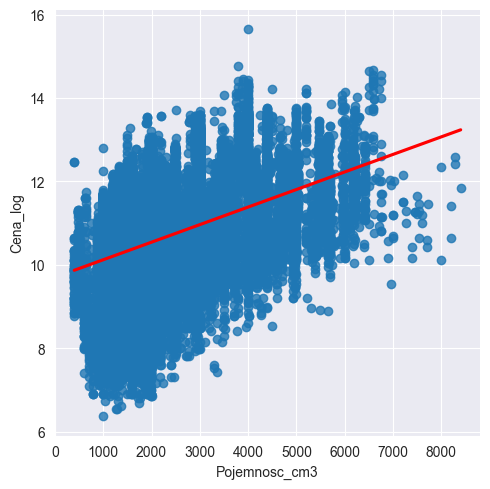

In [15]:
sns.lmplot(x="Pojemnosc_cm3", y="Cena_log", data=df_train, ci=None, line_kws={'color': 'red'})

There are only a few extreme outliers in this small engine volume region. Nontheless, for future more robust
model one fact should be remembered. The electric cars like Tesla shoud have their engine volume deleted or
be marked as electric.

Top 10 mileage : [1111111111.0, 500000000.0, 500000000.0, 206549168.0, 99999999.0]
Top 10 mileage (Test): [1111111111.0, 500000000.0, 500000000.0, 206549168.0, 99999999.0]
Top 10 mileage : [1111111111.0, 500000000.0, 500000000.0, 206549168.0, 99999999.0]
Quantile 90% mileage : 260000.0
IQR based range -176500.0 : 435500.0
Amount of IQR outliers : 586
Duplicates after clipping : 587


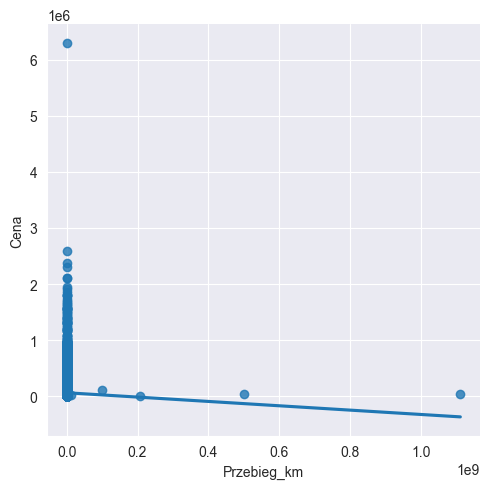

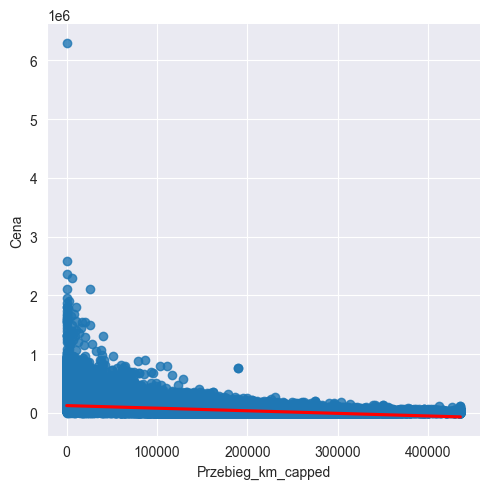

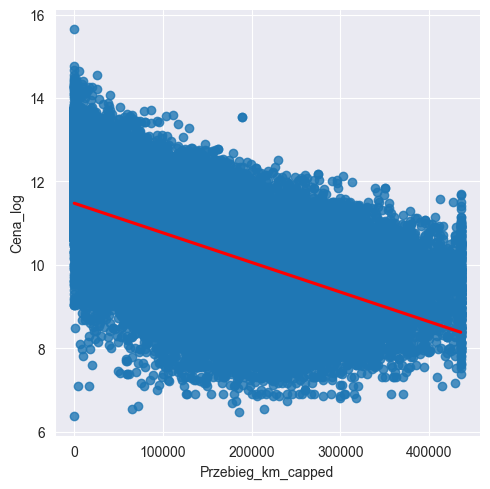

In [16]:
print(f"Top 10 mileage : {df_data.Przebieg_km.sort_values(ascending=False).head(5).to_list()}")
print(f"Top 10 mileage (Test): {df_data.Przebieg_km.sort_values(ascending=False).head(5).to_list()}")
print(f"Top 10 mileage : {df_data.sort_values('Przebieg_km', ascending=False).Przebieg_km.head(5).to_list()}")
print(f"Quantile 90% mileage : {df_data.Przebieg_km.quantile(0.9)}")
print(f"IQR based range {df_data.Przebieg_km.quantile(0.25) - 1.5 * iqr(df_data.Przebieg_km.to_numpy(), nan_policy='omit')} : {df_data.Przebieg_km.quantile(0.75) + 1.5 * iqr(df_data.Przebieg_km.to_numpy(), nan_policy='omit')}")
max_value = df_data.Przebieg_km.quantile(0.75) + 1.5 * iqr(df_data.Przebieg_km.to_numpy(), nan_policy='omit')
super_max_value = df_data.Przebieg_km.quantile(0.75) + 5.0 * iqr(df_data.Przebieg_km.to_numpy(), nan_policy='omit')
print(f"Amount of IQR outliers : {df_data[df_data.Przebieg_km > max_value].shape[0]}")
sns.lmplot(x="Przebieg_km", y="Cena", data=df_data, ci=None)  # Ci will look ridiculous here


df_data.loc[:, 'Przebieg_km_capped'] = df_data.Przebieg_km.to_numpy()
df_data.loc[df_data.Przebieg_km > max_value, 'Przebieg_km_capped'] = max_value
df_data.loc[:, 'Przebieg_km_cleared'] = df_data.Przebieg_km.to_numpy()
df_data.loc[df_data.Przebieg_km > super_max_value, 'Przebieg_km_cleared'] = np.nan
sns.lmplot(x="Przebieg_km_capped", y="Cena", data=df_data, ci=None, line_kws={'color': 'red'})
sns.lmplot(x="Przebieg_km_capped", y="Cena_log", data=df_data, ci=None, line_kws={'color': 'red'})
print(f"Duplicates after clipping : {(df_data.Przebieg_km_capped == max_value).sum()}")
plt.show()

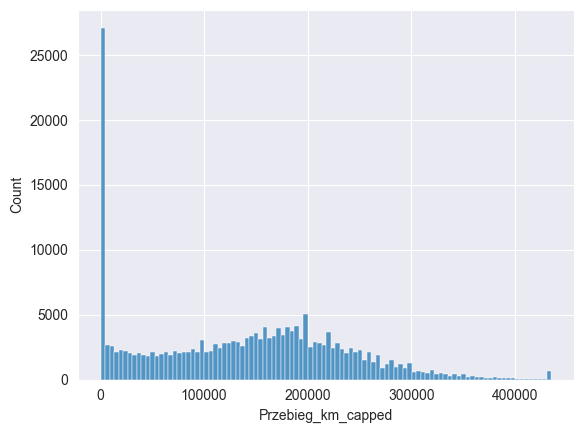

In [17]:
sns.histplot(x="Przebieg_km_capped", data=df_data, bins=100)
plt.show()

Here, on the other hand cutting the mileage based on the IQR might work. It can be seen that outliers are so big
that is hard to see the correlation. After capping the value correlation is much clearer and it can be seen
that for larger values of mileage it is decent.<br/></br>
Nonetheless, it will not help with small values.

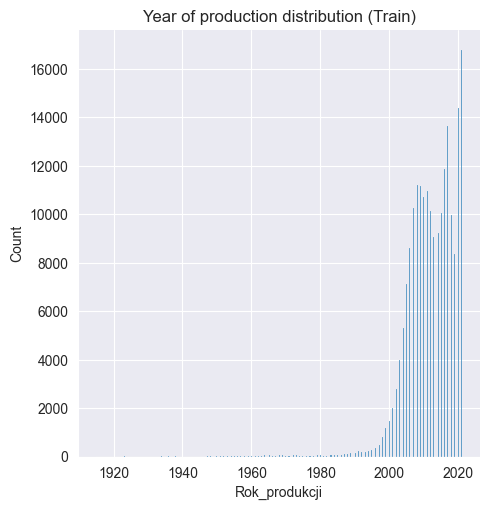

Top 10 age : [1915.0, 1915.0, 1922.0, 1922.0, 1923.0]
Oldest 10 age brands : 


,index,ID,Cena,Waluta,Stan,Marka_pojazdu,Model_pojazdu,Wersja_pojazdu,Generacja_pojazdu,Rok_produkcji,Przebieg_km,Moc_KM,Pojemnosc_cm3,Rodzaj_paliwa,Emisja_CO2,Naped,Skrzynia_biegow,Typ_nadwozia,Liczba_drzwi,Kolor,Kraj_pochodzenia,Pierwszy_wlasciciel,Data_pierwszej_rejestracji,Data_publikacji_oferty,Lokalizacja_oferty,...,wyp_airbag_protecting_the_knees,wyp_led_lights,wyp_active_cruise_control,wyp_lane_assistant,wyp_blind_spot_sensor,wyp_hook,wyp_rear_view_camera,wyp_gps_navigation,wyp_heated_side_mirrors,wyp_leather_upholstery,wyp_electrically_adjustable_seats,wyp_dvd_player,wyp_sunroof,wyp_cd_changer,wyp_xenon_lights,wyp_shift_paddles,wyp_panoramic_roof,Wiek_oferty,wyp_heated_rear_seats,wyp_adjustable_suspension,Cena_log,Moc_KM_brand_capped,Pojemnosc_cm3_capped,Przebieg_km_capped,Przebieg_km_cleared
183449,183449,48053,NaN,PLN,Used,Ford,Other,NaN,NaN,1915.0,5.0,16.0,2960.0,Gasoline,NaN,Rear wheels,Manual,convertible,2.0,black,NaN,NaN,NaN,2021-02-05,"Elbląska - 80-718 Gdańsk, Pomorskie (Polska)",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302.0,0.0,0.0,NaN,16.0,2960.0,5.0,5.0
138284,138284,2888,NaN,PLN,Used,Ford,Other,NaN,NaN,1915.0,5.0,16.0,2960.0,Gasoline,NaN,Rear wheels,Manual,convertible,2.0,black,NaN,NaN,NaN,2021-02-05,"Elbląska - 80-718 Gdańsk, Pomorskie (Polska)",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302.0,0.0,0.0,NaN,16.0,2960.0,5.0,5.0
161638,161638,26242,NaN,PLN,Used,Chevrolet,Other,NaN,NaN,1922.0,70000.0,50.0,2800.0,Gasoline,NaN,NaN,Manual,convertible,5.0,beige,NaN,Yes,NaN,2021-02-05,transport pod dom Chrzanów szpitalna 84 - 32-5...,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302.0,0.0,0.0,NaN,50.0,2800.0,70000.0,70000.0
168324,168324,32928,NaN,PLN,Used,Chevrolet,Other,NaN,NaN,1922.0,70000.0,50.0,2800.0,Gasoline,NaN,NaN,Manual,convertible,5.0,beige,NaN,Yes,NaN,2021-02-05,transport pod dom Chrzanów szpitalna 84 - 32-5...,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302.0,0.0,0.0,NaN,50.0,2800.0,70000.0,70000.0
162984,162984,27588,NaN,PLN,Used,Citroën,Other,NaN,NaN,1923.0,1.0,25.0,1452.0,Gasoline,NaN,NaN,Manual,convertible,4.0,blue,NaN,NaN,NaN,2021-04-30,"Ogrodnicza 5-7 - 95-100 Zgierz, zgierski, Łódz...",...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,218.0,0.0,0.0,NaN,25.0,1452.0,1.0,1.0


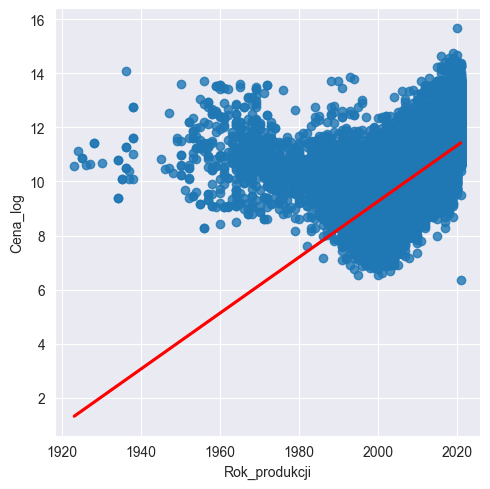

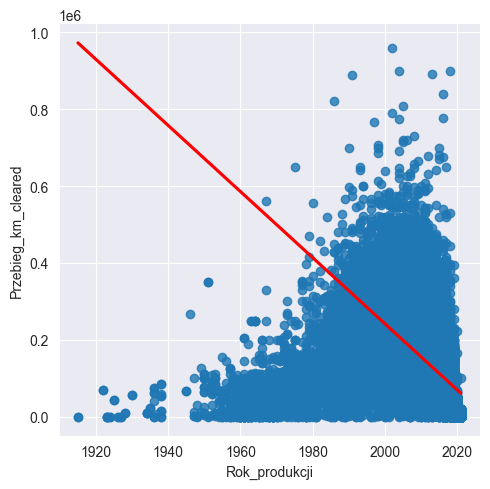

In [18]:
sns.displot(df_data.Rok_produkcji)
plt.title("Year of production distribution (Train)")
plt.show()
print(f"Top 10 age : {df_data.Rok_produkcji.sort_values().head(5).to_list()}")
print("Oldest 10 age brands : ")
display(df_data.sort_values('Rok_produkcji').head(5))

sns.lmplot(x="Rok_produkcji", y="Cena_log", data=df_train, ci=None, line_kws={'color': 'red'})
sns.lmplot(x="Rok_produkcji", y="Przebieg_km_cleared", data=df_data, ci=None, line_kws={'color': 'red'})

## Imputation for numerical features

In [19]:
power_brand_sum = (df_data.Moc_KM.isna() & df_data.Marka_pojazdu.notna()).sum()
power_model_brand_sum = (df_data.Moc_KM.isna() & df_data.Model_pojazdu.isna() & df_data.Marka_pojazdu.notna()).sum()
power_brand_sum, power_model_brand_sum

(3857, 82)

Low ratio above indicates plethora of Horse Power missing data could be filled based on the brand value.

In [20]:
np.random.seed(100)
mask = df_data.Moc_KM.isna() & df_data.Marka_pojazdu.notna()
power = df_data.groupby('Marka_pojazdu').agg({'Moc_KM_brand_capped': ('mean', 'std')})
counts = df_data.Marka_pojazdu.value_counts()
reliable_references = counts.index[counts > 30]

display(df_data.loc[mask, ('Moc_KM_brand_capped', 'Marka_pojazdu')].head(5))
mask = df_data.Marka_pojazdu.isin(reliable_references) & mask
df_data.loc[:, 'Moc_KM_filled'] = df_data.Moc_KM_brand_capped.to_numpy()
df_data.loc[mask, 'Moc_KM_filled'] = df_data.loc[mask, 'Marka_pojazdu'].apply(
    lambda row: (power.loc[row, ('Moc_KM_brand_capped', 'mean')] +
                 np.random.uniform(-0.2, 0.2) * power.loc[row, ('Moc_KM_brand_capped', 'std')])
)
df_data.loc[mask, ('Moc_KM_filled', 'Marka_pojazdu')].head(5)

,Moc_KM_brand_capped,Marka_pojazdu
4,NaN,Toyota
30,NaN,Škoda
201,NaN,Opel
284,NaN,Ford
295,NaN,BMW


,Moc_KM_filled,Marka_pojazdu
4,123.565328,Toyota
30,121.394124,Škoda
201,121.543148,Opel
284,150.818381,Ford
295,195.522271,BMW


## CO2 Emission

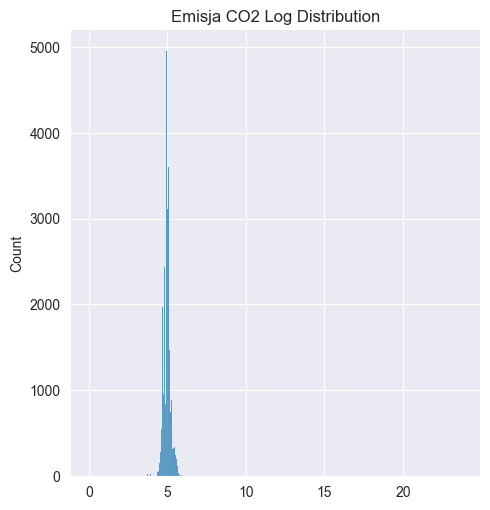

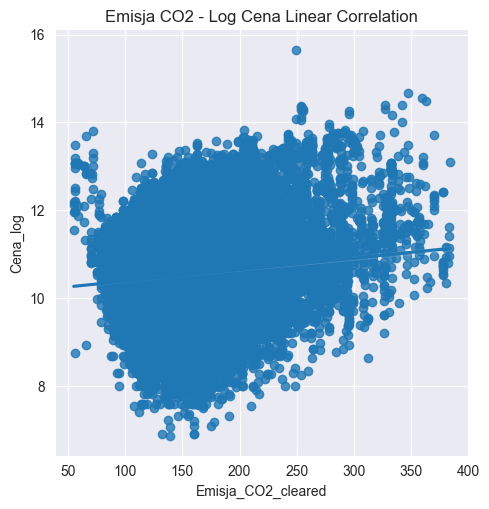

Text(0.5, 1.0, 'Emisja CO2 Cleared Distribution')

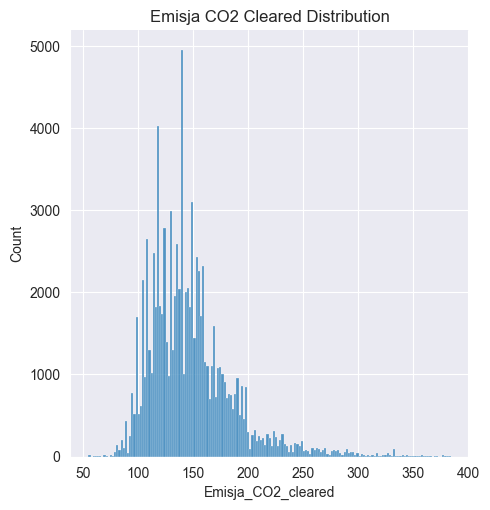

In [21]:
sns.displot(np.log(df_data.Emisja_CO2.to_numpy()))  # Log to be able to see the data with such outliers
plt.title("Emisja CO2 Log Distribution")
plt.show()
IQR = iqr(df_data.Emisja_CO2.to_numpy(), nan_policy='omit')
max_value = df_data.Emisja_CO2.quantile(0.75) + 5.0 * IQR  # Extreme outliers
min_value = df_data.Emisja_CO2.quantile(0.25) - 1.5 * IQR  # Normal bottom outliers
df_data.loc[:, 'Emisja_CO2_cleared'] = df_data.Emisja_CO2.to_numpy()
df_data.loc[(df_data.Emisja_CO2 > max_value) | (df_data.Emisja_CO2 < min_value), 'Emisja_CO2_cleared'] = np.nan
sns.lmplot(df_data, x='Emisja_CO2_cleared', y='Cena_log')
plt.title("Emisja CO2 - Log Cena Linear Correlation")
plt.show()
sns.displot(df_data.Emisja_CO2_cleared)
plt.title("Emisja CO2 Cleared Distribution")

## Categorical features
Analysis of the categorical features cardinality.

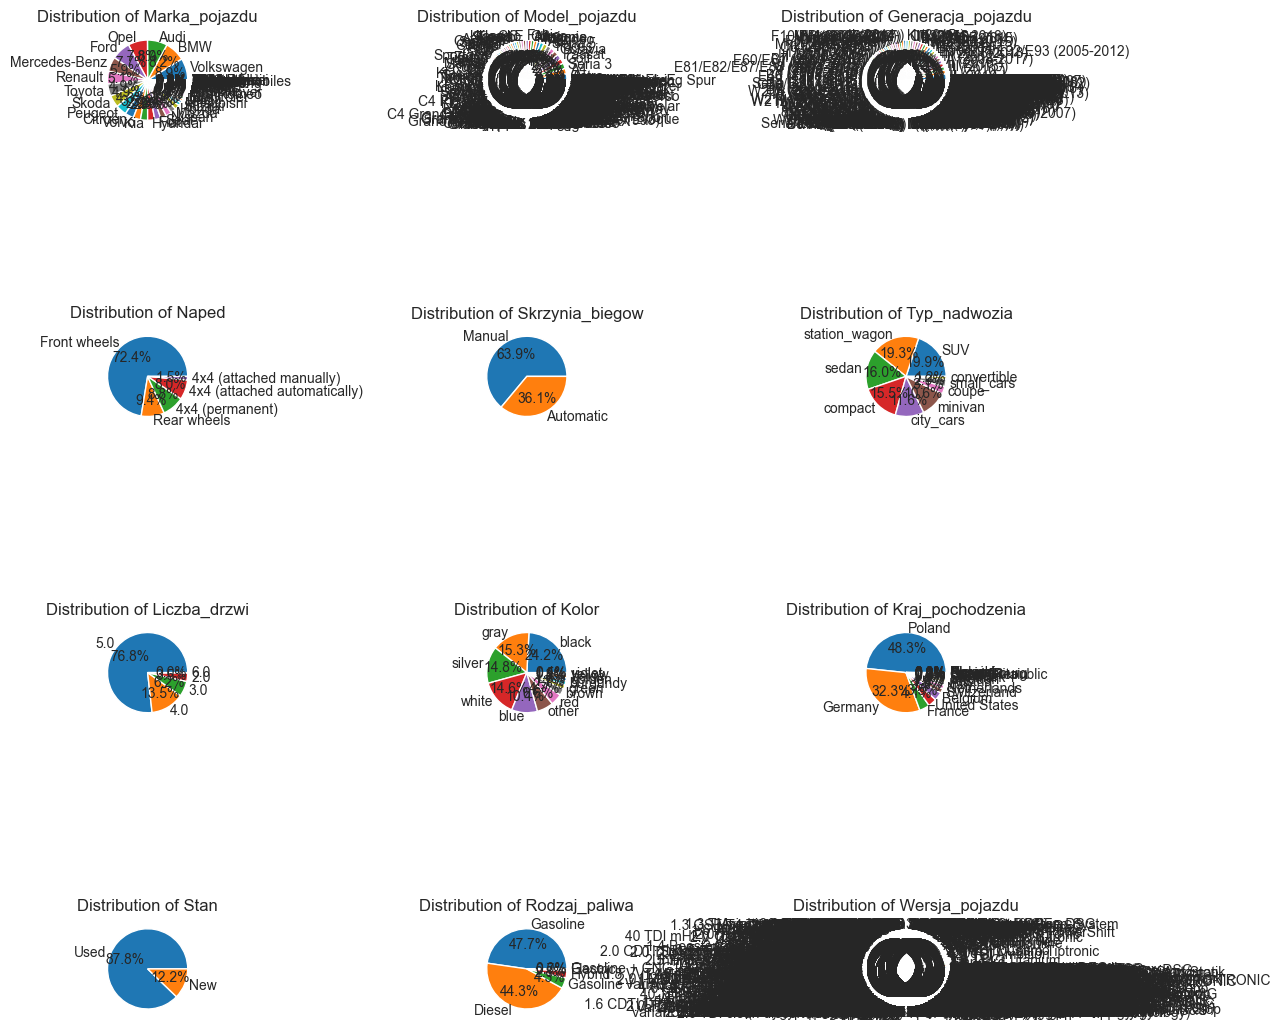

In [22]:
categotrical_features = ['Marka_pojazdu', 'Model_pojazdu', 'Generacja_pojazdu', 'Naped', 'Skrzynia_biegow',                                   'Typ_nadwozia', 'Liczba_drzwi', 'Kolor', 'Kraj_pochodzenia', 'Stan',
                         'Rodzaj_paliwa', 'Wersja_pojazdu']
fig, axes = plt.subplots(4, 3, figsize=(12, 12))
axes = axes.flatten()
for i, feature in enumerate(categotrical_features):
    counts = df_data[feature].value_counts()
    mask = counts > 10
    axes[i].pie(counts[mask], labels=counts.index[mask], autopct='%1.1f%%')
    axes[i].set_title(f"Distribution of {feature}")
plt.tight_layout()

## Small feature engineering
Target encoding for the categorical features.
Target encoding tries to leverage strengths of low cardinality and high cardinality
features individually. Low cardinality provides good sense of the mean values, whereas high cardinality mean is
unreliable, but `min`, `max` and `median` can be used. Also, `nunique` is added, which should have actually been a `count`
as it effectively counts how big is a given group (most of the prices are unique). It would be interesting to measure
the difference on impact between these two (some prices may repeat - should they be counted?).
Nonetheless, as originally it was used, it is left there and can be interpreted as `count`.
The `standard deviation` is added to estimate how trustworthy are the `median` and `mean`
for low cardinality features.

In [23]:
# Too extreme outliers make less reliable validation
df_data.drop(index=df_data.index[df_data.Cena > 6_000_000], inplace=True)

In [24]:
from tqdm import tqdm
from typing import Any, List

##### For category wrapping or omitting
def cat_wrap(df, column, threshold):
    counts = df[column].value_counts()
    mask = df[column].isin(counts[counts < threshold].index)
    df.loc[mask, column] = 'Other'
    return df

def cat_select(df, column, threshold):
    counts = df[column].value_counts()
    mask = df[column].isin(counts[counts < threshold].index)
    df.loc[mask, column] = np.nan
    return df

def target_encode(df: pd.DataFrame, df_unknowns: Any, features: List):
    ##### Target Encoding for high cardinality
    for cat in tqdm(cat_features_high_card):
        df = cat_select(df, cat, 10)
        engineered_stats = ['median', 'max', 'min', 'nunique']
        table_of_cat_stats = df.groupby(cat).agg({'Cena': engineered_stats})
        engineered_features = []
        for stat in engineered_stats:
            stat_series = table_of_cat_stats[('Cena', stat)]
            df.loc[:, f'{cat}_{stat}'] = df.loc[:, cat].map(stat_series)
            if df_unknowns is not None:
                if isinstance(df_unknowns, pd.DataFrame):
                    df_unknowns.loc[:, f'{cat}_{stat}'] = df_unknowns.loc[:, cat].map(stat_series)
                elif isinstance(df_unknowns, list):
                    for dfu in df_unknowns:
                        dfu.loc[:, f'{cat}_{stat}'] = dfu.loc[:, cat].map(stat_series)
                else:
                    raise ValueError('Expected unknown data frames to be list or a single data frame.')
            engineered_features.append(f'{cat}_{stat}')
        features += engineered_features
    
    #### Either One Hot encoding or different Target encoding
    for cat in tqdm(cat_features_low_card):
        df = cat_select(df, cat, 50)
        engineered_stats = ['median', 'mean', 'std']
        table_of_cat_stats = df.groupby(cat).agg({'Cena': engineered_stats})
        engineered_features = []
        for stat in engineered_stats:
            stat_series = table_of_cat_stats[('Cena', stat)]
            df.loc[:, f'{cat}_{stat}'] = df.loc[:, cat].map(stat_series)
            if df_unknowns is not None:
                if isinstance(df_unknowns, pd.DataFrame):
                    df_unknowns.loc[:, f'{cat}_{stat}'] = df_unknowns.loc[:, cat].map(stat_series)
                elif isinstance(df_unknowns, list):
                    for dfu in df_unknowns:
                        dfu.loc[:, f'{cat}_{stat}'] = dfu.loc[:, cat].map(stat_series)
                else:
                    raise ValueError('Expected unknown data frames to be list or a single data frame.')
            engineered_features.append(f'{cat}_{stat}')
        features += engineered_features
    return df, df_unknowns

In [36]:
# Selected features
cat_features_high_card = ['Marka_pojazdu', 'Model_pojazdu', 'Generacja_pojazdu']
cat_features_low_card = ['Naped', 'Skrzynia_biegow', 'Typ_nadwozia', 'Kolor', 'Liczba_drzwi',
                         'Kraj_pochodzenia']
num_features=['Przebieg_km_cleared', 'Moc_KM_brand_capped', 'Pojemnosc_cm3_capped', 'Rok_produkcji',
              'Count_wyposazenia']
features = num_features

# Encode the targets for the
assert np.all(df_test.ID.to_numpy() == df_data.loc[df_data.Cena.isna(), 'ID'].to_numpy()), "General data frame is incorrectly merged."
# Fill the missing brands with their equivalents
print("Maybach is chainged into Rolls-Royce for testing as it does not appear in training.")
df_test.loc[df_test.Marka_pojazdu == 'Maybach', 'Marka_pojazdu'] = 'Rolls-Royce'
print("Brands, which are in test, but not train. They will be set to Nan.")
print(df_test.loc[~np.isin(df_test.Marka_pojazdu, df_train.Marka_pojazdu.unique()), 'Marka_pojazdu'].to_numpy())
df_test.loc[~np.isin(df_test.Marka_pojazdu, df_train.Marka_pojazdu.unique()), 'Marka_pojazdu'] = np.nan

df = df_data.loc[~df_data.Cena.isna()].copy(deep=True).reset_index()
df_submition = df_data.loc[df_data.Cena.isna()].copy(deep=True).reset_index()

Maybach is chainged into Rolls-Royce for testing as it does not appear in training.
Brands, which are in test, but not train. They will be set to Nan.
[nan nan nan nan nan]


## Training
Training XGBoost on K-Fold validation.

In [37]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt
from copy import deepcopy

##### Split the data into K folds, but preserve price distribution
num_folds = 6
target_column='Cena'
df.sort_values(by=target_column, inplace=True, kind='stable')  # Split randomly using modulo, but having even price distribution
folds_idx = np.arange(len(df))
for i in folds_idx:
    folds_idx[i] = i % num_folds
folds = []
for i in range(num_folds):
    test_mask = folds_idx == i % num_folds
    folds.append((np.argwhere(~test_mask).flatten(), np.argwhere(test_mask).flatten()))
y = df[target_column]

# XGBoost parameters
params = {
    'max_depth': 10,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8,  # Equivalent to rsm
    'min_child_weight': 10,     # Smooth the groups, don't allow luxury cars to overfit
    'random_state': 100,
    'reg_lambda': 10,         # L2 regularization (similar to l2_leaf_reg)
    'objective': 'reg:squarederror',  # 'pseudohubererror'
    'eval_metric': 'rmse',
}

# Cross-validation stats
cv_results = {
    'test-rmse-mean': [],
    'test-rmse-std': [],
    'train-rmse-mean': [],
    'train-rmse-std': []
}

fold_scores = []
hardest_examples = []
models = []
scores = []
best_model = None
best_rmse = 1_000_000
safe_num_of_estimators = 0
for i, (train_idx, test_idx) in enumerate(folds):
    print(f"Fold {i+1}/{num_folds}")

    X_train, y_train = df.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = df.iloc[test_idx], y.iloc[test_idx]
    
    # Encode the categories
    # and don't expose data information from validation to train (No data leakage)
    all_features = deepcopy(features)
    X_train, X_test = target_encode(X_train.copy(deep=True), X_test.copy(deep=True), all_features)
    X_train, X_test = X_train[all_features], X_test[all_features]

    # Create DMatrix objects for XGBoost
    dtrain = xgb.DMatrix(X_train.to_numpy(), label=y_train, feature_names=all_features)
    dtest = xgb.DMatrix(X_test.to_numpy(), label=y_test, feature_names=all_features)

    # Train the model
    model = xgb.train(
        params,
        dtrain,
        num_boost_round=15_000,
        evals=[(dtrain, 'train'), (dtest, 'test')],
        early_stopping_rounds=50,
        verbose_eval=100
    )

    # Get predictions
    train_preds = model.predict(dtrain)
    test_preds = model.predict(dtest)

    # Calculate metrics
    train_rmse = sqrt(mean_squared_error(y_train, train_preds))
    test_rmse = sqrt(mean_squared_error(y_test, test_preds))
    
    # Save model if it has the lowest RMSE
    if test_rmse < best_rmse:
        best_rmse = test_rmse
        best_model = model
    safe_num_of_estimators = (safe_num_of_estimators * i + model.best_iteration) / (i + 1)
    
    # Get the examples, which were the hardest to classify
    test_mse = (y_test - test_preds) ** 2
    hardest_args = np.argsort(test_mse)[-5:]
    hardest_validation_examples = X_test.iloc[hardest_args].copy(deep=True)
    hardest_validation_examples.loc[:, 'Prediction'] = test_preds[hardest_args]
    hardest_validation_examples.loc[:, 'Cena'] = y_test.iloc[hardest_args]
    hardest_examples.append(hardest_validation_examples)

    print(f"Fold {i+1} - Train RMSE: {train_rmse:.6f}, Test RMSE: {test_rmse:.6f}")
    fold_scores.append((train_rmse, test_rmse))
    models.append(model)
    scores.append(test_rmse)

# Stats on best model
print(f"Best validation RMSE: {best_rmse:.6f}")
print(f"Average number of estimators: {safe_num_of_estimators}")

# Summarize results
train_scores = [score[0] for score in fold_scores]
test_scores = [score[1] for score in fold_scores]

cv_results['train-rmse-mean'] = np.mean(train_scores)
cv_results['train-rmse-std'] = np.std(train_scores)
cv_results['test-rmse-mean'] = np.mean(test_scores)
cv_results['test-rmse-std'] = np.std(test_scores)

print("\nCross-Validation Results:")
print(f"Train RMSE: {cv_results['train-rmse-mean']:.6f} ± {cv_results['train-rmse-std']:.6f}")
print(f"Test RMSE: {cv_results['test-rmse-mean']:.6f} ± {cv_results['test-rmse-std']:.6f}")

Fold 1/6


100%|██████████| 6/6 [00:00<00:00, 40.87it/s]


[0]	train-rmse:86190.60137	test-rmse:85805.57739
[100]	train-rmse:42463.72802	test-rmse:42624.29565
[200]	train-rmse:26922.97733	test-rmse:28684.22879
[300]	train-rmse:21286.44735	test-rmse:24772.28650
[400]	train-rmse:18768.50540	test-rmse:23809.84156
[500]	train-rmse:17396.81538	test-rmse:23460.74387
[600]	train-rmse:16587.72847	test-rmse:23304.74578
[700]	train-rmse:16032.85939	test-rmse:23221.90150
[800]	train-rmse:15642.76821	test-rmse:23186.33301
[900]	train-rmse:15312.08356	test-rmse:23148.95358
[1000]	train-rmse:15012.13760	test-rmse:23081.71274
[1100]	train-rmse:14751.72905	test-rmse:23015.93724
[1200]	train-rmse:14480.46138	test-rmse:22959.71849
[1300]	train-rmse:14244.67085	test-rmse:22892.83146
[1400]	train-rmse:14034.30433	test-rmse:22845.66825
[1500]	train-rmse:13843.76686	test-rmse:22808.74531
[1600]	train-rmse:13636.50012	test-rmse:22758.65930
[1700]	train-rmse:13428.86296	test-rmse:22713.28952
[1800]	train-rmse:13232.63154	test-rmse:22674.33830
[1900]	train-rmse:13040.

100%|██████████| 6/6 [00:00<00:00, 41.74it/s]


[0]	train-rmse:86169.86355	test-rmse:85903.81416
[100]	train-rmse:42344.42103	test-rmse:43015.36601
[200]	train-rmse:26999.65703	test-rmse:28897.65157
[300]	train-rmse:21436.33816	test-rmse:24725.34931
[400]	train-rmse:18932.01968	test-rmse:23397.42422
[500]	train-rmse:17516.58881	test-rmse:22841.43578
[600]	train-rmse:16654.28881	test-rmse:22544.33704
[700]	train-rmse:16081.10478	test-rmse:22391.33999
[800]	train-rmse:15660.31409	test-rmse:22294.49891
[900]	train-rmse:15311.32844	test-rmse:22226.61068
[1000]	train-rmse:15010.88438	test-rmse:22170.43055
[1100]	train-rmse:14718.03943	test-rmse:22104.00743
[1200]	train-rmse:14443.49759	test-rmse:22057.43681
[1300]	train-rmse:14204.20047	test-rmse:22016.25314
[1400]	train-rmse:13969.42333	test-rmse:21978.72949
[1500]	train-rmse:13747.94554	test-rmse:21945.43683
[1600]	train-rmse:13536.13301	test-rmse:21909.11166
[1700]	train-rmse:13327.23023	test-rmse:21857.44874
[1800]	train-rmse:13143.17778	test-rmse:21830.39670
[1900]	train-rmse:12955.

100%|██████████| 6/6 [00:00<00:00, 42.88it/s]


[0]	train-rmse:86102.26483	test-rmse:86231.11982
[100]	train-rmse:42150.97106	test-rmse:44112.13528
[200]	train-rmse:26750.15538	test-rmse:30518.07870
[300]	train-rmse:21193.34357	test-rmse:26363.83947
[400]	train-rmse:18680.63240	test-rmse:24934.00616
[500]	train-rmse:17325.67087	test-rmse:24311.42333
[600]	train-rmse:16509.29099	test-rmse:23995.57371
[700]	train-rmse:15933.47723	test-rmse:23783.03371
[800]	train-rmse:15488.87474	test-rmse:23624.86787
[900]	train-rmse:15144.59949	test-rmse:23525.28331
[1000]	train-rmse:14838.94693	test-rmse:23440.47816
[1100]	train-rmse:14542.89258	test-rmse:23375.85773
[1200]	train-rmse:14264.45387	test-rmse:23312.60118
[1300]	train-rmse:14013.12508	test-rmse:23247.74387
[1400]	train-rmse:13788.18587	test-rmse:23203.50441
[1500]	train-rmse:13557.23629	test-rmse:23164.13352
[1600]	train-rmse:13335.65596	test-rmse:23118.17811
[1700]	train-rmse:13121.55543	test-rmse:23085.98183
[1800]	train-rmse:12937.75878	test-rmse:23046.00609
[1900]	train-rmse:12750.

100%|██████████| 6/6 [00:00<00:00, 43.12it/s]


[0]	train-rmse:86060.21998	test-rmse:86456.86729
[100]	train-rmse:42230.02639	test-rmse:43391.95806
[200]	train-rmse:26836.47537	test-rmse:29577.32540
[300]	train-rmse:21283.12027	test-rmse:25526.32183
[400]	train-rmse:18796.82896	test-rmse:24061.05329
[500]	train-rmse:17445.38400	test-rmse:23380.39605
[600]	train-rmse:16622.76243	test-rmse:23039.19687
[700]	train-rmse:16103.39569	test-rmse:22821.12079
[800]	train-rmse:15707.11066	test-rmse:22694.29323
[900]	train-rmse:15364.51761	test-rmse:22581.49887
[1000]	train-rmse:15064.01071	test-rmse:22509.04435
[1100]	train-rmse:14770.48657	test-rmse:22421.25130
[1200]	train-rmse:14477.79840	test-rmse:22338.46358
[1300]	train-rmse:14218.62981	test-rmse:22258.56605
[1400]	train-rmse:13971.58223	test-rmse:22187.43089
[1500]	train-rmse:13740.09710	test-rmse:22132.45597
[1600]	train-rmse:13517.58596	test-rmse:22082.65682
[1700]	train-rmse:13314.20936	test-rmse:22052.94294
[1800]	train-rmse:13128.57499	test-rmse:22032.60714
[1900]	train-rmse:12934.

100%|██████████| 6/6 [00:00<00:00, 42.73it/s]


[0]	train-rmse:85963.91429	test-rmse:86931.03417
[100]	train-rmse:41936.50081	test-rmse:45297.34138
[200]	train-rmse:26435.91700	test-rmse:32549.84522
[300]	train-rmse:20891.47032	test-rmse:28886.17498
[400]	train-rmse:18425.71124	test-rmse:27439.43091
[500]	train-rmse:17077.65545	test-rmse:26799.30617
[600]	train-rmse:16216.07425	test-rmse:26471.65765
[700]	train-rmse:15594.02738	test-rmse:26254.31465
[800]	train-rmse:15118.72247	test-rmse:26102.04496
[900]	train-rmse:14744.12939	test-rmse:25984.52012
[1000]	train-rmse:14417.64216	test-rmse:25936.30236
[1100]	train-rmse:14090.13126	test-rmse:25836.61701
[1200]	train-rmse:13804.08431	test-rmse:25784.53079
[1300]	train-rmse:13541.06179	test-rmse:25706.08878
[1400]	train-rmse:13293.82473	test-rmse:25642.60696
[1500]	train-rmse:13064.09394	test-rmse:25598.85873
[1600]	train-rmse:12844.33876	test-rmse:25575.49429
[1700]	train-rmse:12631.24094	test-rmse:25537.88204
[1800]	train-rmse:12436.08853	test-rmse:25501.36180
[1900]	train-rmse:12246.

100%|██████████| 6/6 [00:00<00:00, 41.38it/s]


[0]	train-rmse:86255.11203	test-rmse:85475.01853
[100]	train-rmse:42396.11350	test-rmse:42197.51795
[200]	train-rmse:26969.73607	test-rmse:28207.07750
[300]	train-rmse:21392.97641	test-rmse:24260.23672
[400]	train-rmse:18901.79963	test-rmse:23124.66951
[500]	train-rmse:17523.94673	test-rmse:22719.64180
[600]	train-rmse:16638.94399	test-rmse:22509.12454
[700]	train-rmse:16038.21342	test-rmse:22341.42316
[800]	train-rmse:15607.55325	test-rmse:22235.00233
[900]	train-rmse:15250.63015	test-rmse:22160.37026
[1000]	train-rmse:14917.17742	test-rmse:22064.40510
[1100]	train-rmse:14613.75896	test-rmse:21974.65871
[1200]	train-rmse:14342.70361	test-rmse:21908.69623
[1300]	train-rmse:14098.22479	test-rmse:21855.86500
[1400]	train-rmse:13866.20358	test-rmse:21791.94636
[1500]	train-rmse:13634.79786	test-rmse:21745.10773
[1600]	train-rmse:13427.33007	test-rmse:21698.48301
[1700]	train-rmse:13230.04275	test-rmse:21662.05289
[1800]	train-rmse:13049.45036	test-rmse:21641.09695
[1900]	train-rmse:12868.

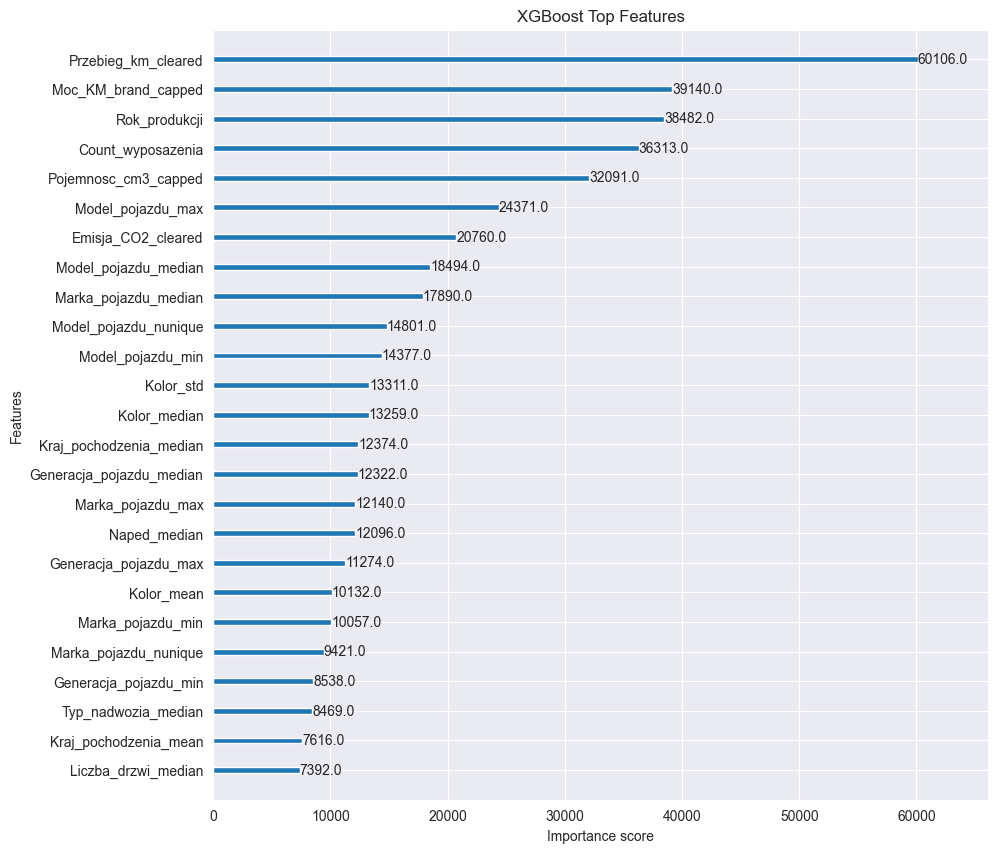

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(
    model,
    ax=ax,
    max_num_features=25,
    importance_type="weight", # 'gain', 'cover', 'total_gain', 'total_cover'
)
plt.title("XGBoost Top Features")
plt.show()

Finally, the ensemble of folded models, can be used to predict the final outcome. Nonetheless, it may also propagate
individual models errors. Theoretically, it should be less risky option compared to retraining model on whole dataset,
but also provide less gain as none of the models could see all the relations in the data. Lastly, the target encoding
will change a little bit for it, which introduces a minor risk.

In [28]:
weights = np.array(scores) / np.sum(scores)
def ensemble_predict(data):
    prediction = 0
    for weight, model in tqdm(zip(weights, models), desc="Predicting", total=(len(models))):
        prediction += weight * model.predict(data)
    return prediction

The ensemble can be also used on the final test set.

In [29]:
all_features = deepcopy(features)
X_train, X_submition = target_encode(df.copy(deep=True), df_submition.copy(deep=True), all_features)
X_train, X_submition = X_train[all_features], X_submition[all_features]
dsub = xgb.DMatrix(X_submition.to_numpy(), feature_names=all_features)
predictions = ensemble_predict(dsub)

Predicting: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]


## Train the final model
Traininig the final model is performed on the whole dataset to maximise the gain from the data. In such case one have
to be extra careful about overfitting.

In [38]:
# Create very small validation set for final training early stopping
modulo = 1000
df.sort_values(by=target_column, inplace=True, kind='stable')  # Split randomly using modulo, but having even price distribution

test_mask = np.arange(len(df)) % modulo == 0
train_idx, test_idx = np.argwhere(~test_mask).flatten(), np.argwhere(test_mask).flatten()

y = df[target_column]

X_train, y_train = df.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = df.iloc[test_idx], y.iloc[test_idx]

# Encode the categories
# and don't expose data information from validation to train (No data leakage)
all_features = deepcopy(features)
X_train, (X_test, X_submition) = target_encode(X_train.copy(deep=True), [X_test.copy(deep=True), df_submition.copy(deep=True)], all_features)
X_train, X_test, X_submition = X_train.loc[:, all_features], X_test.loc[:, all_features], X_submition.loc[:, all_features]

# Create DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train.to_numpy(), label=y_train, feature_names=all_features)
dtest = xgb.DMatrix(X_test.to_numpy(), label=y_test, feature_names=all_features)
# Train the model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=900,     # To ensure there is no overfitting (based on where model improvement plateaus)
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=50,
    verbose_eval=100
)

# Predict
dsub = xgb.DMatrix(X_submition.to_numpy(), feature_names=all_features)
predictions = model.predict(dsub)
print(f"Maximal prediction value detected : {predictions.max()}")
print(f"Maximal target in train : {y_train.max()}")
print(f"Maximal target in test : {y_test.max()}")

100%|██████████| 6/6 [00:00<00:00, 27.83it/s]


[0]	train-rmse:86117.74410	test-rmse:82907.84967
[100]	train-rmse:41970.23642	test-rmse:41496.03832
[200]	train-rmse:26603.21661	test-rmse:26431.75624
[300]	train-rmse:21105.40972	test-rmse:21021.54226
[400]	train-rmse:18680.39019	test-rmse:19141.13615
[500]	train-rmse:17353.66993	test-rmse:18647.45620
[600]	train-rmse:16521.82309	test-rmse:18226.72441
[700]	train-rmse:15947.72240	test-rmse:18032.50299
[800]	train-rmse:15519.24337	test-rmse:17890.62694
[899]	train-rmse:15197.90550	test-rmse:17872.38044
Maximal prediction value detected : 1689280.25
Maximal target in train : 2583000.0
Maximal target in test : 672195.0


In [31]:
from utils.preprocessing import preprocess_currency

model.save_model('submission_model.json')

df_submit = df_test.copy(deep=True)
df_submit['Cena'] = predictions
df_submit = preprocess_currency(df_submit, invert=True)

df_submit.drop(columns=[col for col in df_test.columns if col not in ['ID', 'Cena']], inplace=True)
display(df_submit)
df_submit.to_csv('submission.csv', index=False)

Log: Amount of samples with foreign currency  : 99


,ID,Cena
0,1,208679.359375
1,2,19201.171875
2,3,20728.794922
3,4,99796.804688
4,5,91956.156250
...,...,...
72902,72903,116284.351562
72903,72904,32030.380859
72904,72905,60419.589844
72905,72906,24664.164062


In [32]:
df_test.iloc[np.argsort(predictions)[-2]]

ID                                 56490
Waluta                               PLN
Stan                                 New
Marka_pojazdu                Rolls-Royce
Model_pojazdu                     Wraith
                                ...     
wyp_dvd_player                         1
wyp_heated_windscreen                  0
wyp_adjustable_suspension              1
wyp_sunroof                            0
Wiek_oferty                        219.0
Name: 56489, Length: 92, dtype: object

In [33]:
np.sort(predictions)[-1]

1689203.9

In [34]:
df_submit = df_test.copy(deep=True)
df_submit['Cena'] = predictions
df_submit = preprocess_currency(df_submit, invert=True)

mask = df_submit.Waluta == 'EUR'
print(predictions[mask][:10], df_submit.Cena[mask].to_numpy()[:10])

Log: Amount of samples with foreign currency  : 99


[ 62816.832  87930.484  56701.375  21800.902  78192.586 342826.56
  67562.96  136001.33    7768.487  33696.113] [14608.56558866 20448.94985465 13186.36627907  5069.97728924
 18184.32231105 79727.10755814 15712.31649709 31628.21584302
  1806.62484102  7836.30541424]


In [35]:
predictions[1]

19201.172